#### Importing necessary libraries


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [50]:
gold_prices = pd.read_csv('gld_price_data.csv')

In [51]:
gold_prices.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [52]:
gold_prices.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [53]:
gold_prices.shape

(2290, 6)

In [54]:
gold_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [55]:
gold_prices.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [56]:
gold_prices.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [57]:
correlation = gold_prices.corr()

<AxesSubplot:>

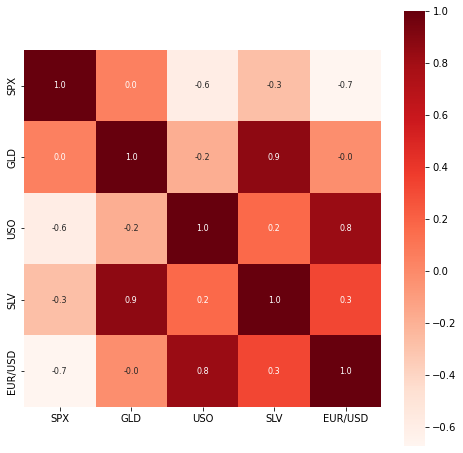

In [58]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [59]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


A:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

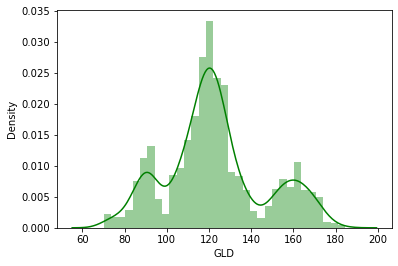

In [60]:
sns.distplot(gold_prices['GLD'], color= 'green')

In [61]:
X = gold_prices.drop(['Date', 'GLD'], axis=1)
Y = gold_prices['GLD']

In [62]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [63]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [65]:
regressor = RandomForestRegressor(n_estimators=100)

In [66]:
# train model 
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [67]:
test_data_prediction = regressor.predict(X_test)

In [68]:
print(test_data_prediction)

[168.41639943  81.8296999  116.02580022 127.62460082 120.62190144
 154.68069711 149.89519846 126.08360046 117.5089988  126.05810063
 116.79050096 171.87520095 141.24109871 168.33499877 115.02769985
 117.95000047 139.26230319 170.18680061 159.78370251 156.81669895
 155.11290019 125.46220044 176.85839926 157.50800357 125.16650038
  93.7214      77.91590001 120.49039966 119.0651994  167.37559925
  88.11810035 125.21950001  91.33040106 117.6835002  121.11639895
 136.2304012  115.7194007  115.39020091 147.5424997  106.98630105
 103.5558021   87.17509787 126.56010073 118.02230009 151.95099933
 119.66970005 108.33249991 108.11689834  93.20290078 127.12179745
  74.9195005  113.7487994  121.4255     111.21299885 118.72879876
 120.37939961 158.87410059 168.0130014  147.3369969   85.86149865
  94.21060008  86.94579872  90.41120022 118.926001   126.34930066
 127.40930026 169.35150003 122.20349923 117.08699893  98.96130063
 168.20110171 143.34039847 132.45750214 121.3162021  120.73009942
 119.66900

In [69]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared error :", error_score)

R Squared error : 0.9888437129381443


In [70]:
# compare actual vs predicted values 
Y_test = list(Y_test)

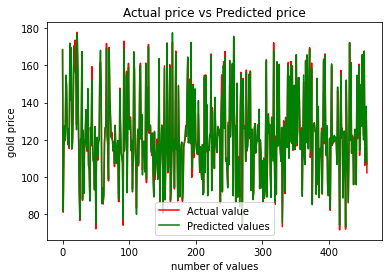

In [71]:
plt.plot(Y_test, color='red', label= 'Actual value')
plt.plot(test_data_prediction, color='green', label='Predicted values')
plt.title('Actual price vs Predicted price')
plt.xlabel('number of values')
plt.ylabel('gold price')
plt.legend()
plt.show()